# Tutorial for COMP7606 Assignment 1

In this tutorial, I will show you how to
- train a baseline model for cat pose estimation

This tutorial only contains some basic usage of MMPose. 
Please learn more about MMPose at https://mmpose.readthedocs.io/en/latest/.

Let's start!

In [1]:
# Colab
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab

Mounted at /content/drive
/content/drive/MyDrive/Colab


## Install MMPose

We recommend to use a conda environment to install mmpose and its dependencies. And compilers `nvcc` and `gcc` are required.

In [ ]:
# check NVCC version
!nvcc -V

# check GCC version
!gcc --version

# check python in conda environment
!python --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Python 3.7.12


In [ ]:
# install pytorch
!pip install torch

# install mmcv-full. Please follow the instruction (https://github.com/open-mmlab/mmcv) to install mmcv-full.
!pip install mmcv-full==1.3.18 -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

# install mmdet for inference demo
!pip install mmdet

# clone mmpose repo
# !rm -rf mmpose
# !git clone https://github.com/open-mmlab/mmpose.git

# clone necessary files for this assignment
# !rm -rf COMP7606
# !git clone https://github.com/jin-s13/COMP7606.git

%cd mmpose

# install mmpose dependencies
!pip install -r requirements.txt

# install mmpose in develop mode
!pip install -e .

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 58.0 MB 5.7 MB/s 
     |████████████████████████████████| 190 kB 7.7 MB/s 
     |████████████████████████████████| 1.3 MB 7.3 MB/s 
/content/drive/MyDrive/Colab/mmpose
Ignoring dataclasses: markers 'python_version == "3.6"' don't match your environment
  Cloning https://github.com/svenkreiss/poseval.git to /tmp/pip-install-xe13bwqt/poseval_24b5f2ab718440f6aaf15f5a12ef1c24
  Running command git clone -q https://github.com/svenkreiss/poseval.git /tmp/pip-install-xe13bwqt/poseval_24b5f2ab718440f6aaf15f5a12ef1c24
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 50 kB 4.1 MB/s 
     |████████████████████████████████| 276 kB 18.3 MB/s 
     |████████████████████████████████| 64 kB 3.5 MB/s 
     |████████████████████████████████| 45 kB 4.3 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████

In [ ]:
# Check Pytorch installation
import torch, torchvision
print('torch version:', torch.__version__, torch.cuda.is_available())
print('torchvision version:', torchvision.__version__)

# Check MMPose installation
import mmpose
print('mmpose version:', mmpose.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('cuda version:', get_compiling_cuda_version())
print('compiler information:', get_compiler_version())

torch version: 1.10.0+cu111 True
torchvision version: 0.11.1+cu111
mmpose version: 0.23.0
cuda version: 11.1
compiler information: GCC 7.3


In [ ]:
!pip install tensorboard tensorboardX

## Train a cat pose estimation model 

To train a cat pose estimation model on a customized dataset with MMPose, there are usually three steps:
1. Support the dataset in MMPose
1. Create a config
1. Perform training and evaluation

### Add a new dataset

There are two methods to support a customized dataset in MMPose. The first one is to convert the data to a supported format (e.g. COCO) and use the corresponding dataset class (e.g. TopdownCOCODataset), as described in the [document](https://mmpose.readthedocs.io/en/latest/tutorials/2_new_dataset.html#reorganize-dataset-to-existing-format). The second one is to add a new dataset class. In this tutorial, we give an example of the second method.

We first download the dataset, which contains 1328 images (1000 for training, 128 for validation and 200 for testing).

In [ ]:
# download dataset
%mkdir data
%mkdir data/cats
%cp ../COMP7606/Cats.tar data/cats
%cd data/cats
!tar -xf Cats.tar
%cd ../../

/userhome/cs/u3590650/COMP7606/mmpose/data/cats
/userhome/cs/u3590650/COMP7606/mmpose


In [ ]:
# The <_base_/cats.py> contains the dataset information, i.e. the keypoint definition, flip pairs, and sigmas for evaluation.
!cp ../COMP7606/configs/_base_/cats.py configs/_base_/datasets/ 
# The <configs/cats/res50_cats_128x128.py> is a baseline config file. You can use this to train/evaluate the model. 
# But the performance of the baseline model is not good enough. You should try to improve it!
!cp -r ../COMP7606/configs/cats configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/ 

In [ ]:
%cd /content/drive/MyDrive/Colab/mmpose
%pwd

/content/drive/MyDrive/Colab/mmpose


'/content/drive/MyDrive/Colab/mmpose'

In [ ]:
# config_filename = "res50_cats_128x128"
# config_filename = "res101_cats_256x256"
# config_filename = "res152_cats_256x256" # no tuning in train_pipeline
# config_filename = "hrnet_cats_w32"
# config_filename = "hrnet_cats_w48"
# config_filename = "res101_cats_256x256_1"
# config_filename = "hrnet_cats_w48_1" # 410 epochs, no TopDownHalfBodyTransform
# config_filename = "hrnet_cats_w48_2" # 410 epochs, TopDownHalfBodyTransform
# config_filename = "hrnet_cats_w48_3" # lr 5e-3
# config_filename = "hrnet_cats_w48_4" # lr 5e-5
# config_filename = "hrnet_cats_w48_5" # lr 5e-6
# config_filename = "hrnet_cats_w48_6" # batch size 32
# config_filename = "hrnet_cats_w32_1" # repeat
# config_filename = "hrnet_cats_w32_2" # 410 epochs
#config_filename = "hrnet_cats_w48_7" # 170 300
# config_filename = "hrnet_cats_w48_9" # mpii
# config_filename = "hrnet_cats_w48_10" # coco 384x288
# config_filename = "hrnet_cats_w48_11" # coco 256x192
# config_filename = "hrnet_cats_w48_12" # coco 256x192 nadam - HKU GPU Farm & Colab
config_filename = "hrnet_cats_w48_13" # coco 256x192 nadam 65 170 - Best performance
# config_filename = "hrnet_cats_w48_14" # coco 256x192 nadam 65 170 batch size 32

After downloading the data, we implement a new dataset class to load data samples for model training and validation. In this assignment, we are going to train a top-down pose estimation model (refer to [Top-down Pose Estimation](https://github.com/open-mmlab/mmpose/tree/master/configs/body/2d_kpt_sview_rgb_img/topdown_heatmap#readme) for a brief introduction), the new dataset class inherits `AnimalAP10KDataset`.

In [ ]:
import json
import os
import os.path as osp
from collections import OrderedDict

import numpy as np

from mmpose.core.evaluation.top_down_eval import (keypoint_nme,
                                                  keypoint_pck_accuracy)
from mmpose.datasets.builder import DATASETS
from mmpose.datasets.datasets.animal import AnimalAP10KDataset


@DATASETS.register_module()
class AnimalCatsDataset(AnimalAP10KDataset):

	def __init__(self,
				 ann_file,
				 img_prefix,
				 data_cfg,
				 pipeline,
				 dataset_info=None,
				 test_mode=False):
		super().__init__(
			ann_file, img_prefix, data_cfg, pipeline, dataset_info, test_mode=test_mode)

In [ ]:
### Create a training config file

# In the next step, we create a config file which configures the model, dataset and runtime settings. More information can be found at [Learn about Configs](https://mmpose.readthedocs.io/en/latest/tutorials/0_config.html). A common practice to create a config file is deriving from a existing one. In this tutorial, we load a config file that trains a ResNet on COCO dataset, and modify it to adapt to the Cats dataset.

# Note that the following config file is just an example to show how to train a model. 
# This config file is far from optimal and the baseline model is not good enough. You should try your best to improve it. 

SyntaxError: invalid syntax (350224803.py, line 3)

In [ ]:
from mmcv import Config
# cfg = Config.fromfile(
#     './configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/cats/res50_cats_128x128.py'
# )
cfg = Config.fromfile(
    './configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/cats/' + config_filename + '.py'
)

# set basic configs
cfg.data_root = 'data/cats'
#cfg.work_dir = 'work_dirs/res50_cats_128x128'
cfg.work_dir = 'work_dirs/' + config_filename
cfg.gpu_ids = range(1)
cfg.seed = 0

# set log interval
cfg.log_config.interval = 5

# set evaluation configs
cfg.evaluation.interval = 5

# set batch size
cfg.data.samples_per_gpu = 32
cfg.data.val_dataloader = dict(samples_per_gpu=32)
cfg.data.test_dataloader = dict(samples_per_gpu=32)


# set dataset configs
cfg.data.train.type = 'AnimalCatsDataset'
cfg.data.train.ann_file = f'{cfg.data_root}/annotations/train.json'
cfg.data.train.img_prefix = f'{cfg.data_root}/images/'

cfg.data.val.type = 'AnimalCatsDataset'
cfg.data.val.ann_file = f'{cfg.data_root}/annotations/val.json'
cfg.data.val.img_prefix = f'{cfg.data_root}/images/'

cfg.data.test.type = 'AnimalCatsDataset'
cfg.data.test.ann_file = f'{cfg.data_root}/annotations/test_info.json'
cfg.data.test.img_prefix = f'{cfg.data_root}/images/'

print(cfg.pretty_text)


dataset_info = dict(
    dataset_name='cats',
    paper_info=dict(
        title='Assignment for COMP7606',
        year='2022',
        homepage='https://github.com/jin-s13/COMP7606'),
    keypoint_info=dict({
        0:
        dict(
            name='L_Eye', id=0, color=[0, 255, 0], type='upper', swap='R_Eye'),
        1:
        dict(
            name='R_Eye',
            id=1,
            color=[255, 128, 0],
            type='upper',
            swap='L_Eye'),
        2:
        dict(name='Nose', id=2, color=[51, 153, 255], type='upper', swap=''),
        3:
        dict(name='Neck', id=3, color=[51, 153, 255], type='upper', swap=''),
        4:
        dict(
            name='Root of tail',
            id=4,
            color=[51, 153, 255],
            type='lower',
            swap=''),
        5:
        dict(
            name='L_Shoulder',
            id=5,
            color=[51, 153, 255],
            type='upper',
            swap='R_Shoulder'),
        6:
        dict(
  

### Train and Evaluation

In [ ]:
from mmpose.datasets import build_dataset
from mmpose.models import build_posenet
from mmpose.apis import train_model
import mmcv

# build dataset
datasets = [build_dataset(cfg.data.train)]

# build model
model = build_posenet(cfg.model)

# create work_dir
mmcv.mkdir_or_exist(cfg.work_dir)

# train model
train_model(
    model, datasets, cfg, distributed=False, validate=True, meta=dict())

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
=> num_images: 1000
=> load 1104 samples
load checkpoint from http path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth


2022-03-13 04:58:13,794 - mmpose - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: keypoint_head.final_layer.weight, keypoint_head.final_layer.bias

2022-03-13 04:58:17,038 - mmpose - INFO - Start running, host: root@de846b4c6326, work_dir: /content/drive/MyDrive/Colab/mmpose/work_dirs/hrnet_cats_w48_14
2022-03-13 04:58:17,040 - mmpose - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(NORMAL      ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
(VERY_LOW    ) TensorboardLoggerHook              
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHook                           
(LOW         ) IterTimerHook                      
(VERY_LOW    ) TextLoggerHook                     
(VERY_LOW    ) TensorboardLoggerHook   

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
=> num_images: 124
=> load 132 samples


2022-03-13 04:58:29,718 - mmpose - INFO - Epoch [1][5/35]	lr: 4.496e-06, eta: 4:08:50, time: 2.033, data_time: 1.064, memory: 9300, heatmap_loss: 0.0012, acc_pose: 0.0503, loss: 0.0012
2022-03-13 04:58:38,371 - mmpose - INFO - Epoch [1][10/35]	lr: 9.491e-06, eta: 3:50:11, time: 1.731, data_time: 0.815, memory: 9300, heatmap_loss: 0.0014, acc_pose: 0.0603, loss: 0.0014
2022-03-13 04:58:48,331 - mmpose - INFO - Epoch [1][15/35]	lr: 1.449e-05, eta: 3:54:31, time: 1.992, data_time: 1.078, memory: 9300, heatmap_loss: 0.0013, acc_pose: 0.0450, loss: 0.0013
2022-03-13 04:58:57,989 - mmpose - INFO - Epoch [1][20/35]	lr: 1.948e-05, eta: 3:54:46, time: 1.932, data_time: 1.025, memory: 9300, heatmap_loss: 0.0013, acc_pose: 0.0652, loss: 0.0013
2022-03-13 04:59:07,269 - mmpose - INFO - Epoch [1][25/35]	lr: 2.448e-05, eta: 3:53:00, time: 1.856, data_time: 0.943, memory: 9300, heatmap_loss: 0.0014, acc_pose: 0.0470, loss: 0.0014
2022-03-13 04:59:16,853 - mmpose - INFO - Epoch [1][30/35]	lr: 2.947e-0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 4.9 task/s, elapsed: 27s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.330
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.738
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.173
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.329
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.408
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.780
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.311
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium 

2022-03-13 05:02:52,093 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_5.pth.
2022-03-13 05:02:52,095 - mmpose - INFO - Best AP is 0.3301 at 5 epoch.
2022-03-13 05:02:52,101 - mmpose - INFO - Epoch(val) [5][5]	AP: 0.3301, AP .5: 0.7384, AP .75: 0.1732, AP (M): 0.1041, AP (L): 0.3286, AR: 0.4083, AR .5: 0.7803, AR .75: 0.3106, AR (M): 0.3400, AR (L): 0.4087
2022-03-13 05:02:59,371 - mmpose - INFO - Epoch [6][5/35]	lr: 1.793e-04, eta: 2:21:02, time: 1.450, data_time: 0.492, memory: 9300, heatmap_loss: 0.0009, acc_pose: 0.4204, loss: 0.0009
2022-03-13 05:03:04,505 - mmpose - INFO - Epoch [6][10/35]	lr: 1.843e-04, eta: 2:20:26, time: 1.027, data_time: 0.004, memory: 9300, heatmap_loss: 0.0008, acc_pose: 0.4424, loss: 0.0008
2022-03-13 05:03:09,326 - mmpose - INFO - Epoch [6][15/35]	lr: 1.893e-04, eta: 2:19:40, time: 0.964, data_time: 0.003, memory: 9300, heatmap_loss: 0.0008, acc_pose: 0.4216, loss: 0.0008
2022-03-13 05:03:13,926 - mmpose - INFO - Epoch [6][20/35]	lr: 1.94

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 40.4 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 05:06:22,886 - mmpose - INFO - The previous best checkpoint /content/drive/MyDrive/Colab/mmpose/work_dirs/hrnet_cats_w48_14/best_AP_epoch_5.pth was removed


DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.573
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.912
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.609
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.238
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.579
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.645
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.932
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.689
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.540
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.654


2022-03-13 05:06:29,691 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_10.pth.
2022-03-13 05:06:29,700 - mmpose - INFO - Best AP is 0.5734 at 10 epoch.
2022-03-13 05:06:29,709 - mmpose - INFO - Epoch(val) [10][5]	AP: 0.5734, AP .5: 0.9124, AP .75: 0.6095, AP (M): 0.2381, AP (L): 0.5787, AR: 0.6455, AR .5: 0.9318, AR .75: 0.6894, AR (M): 0.5400, AR (L): 0.6540
2022-03-13 05:06:37,734 - mmpose - INFO - Epoch [11][5/35]	lr: 3.541e-04, eta: 2:07:43, time: 1.598, data_time: 0.540, memory: 9300, heatmap_loss: 0.0006, acc_pose: 0.5670, loss: 0.0006
2022-03-13 05:06:42,687 - mmpose - INFO - Epoch [11][10/35]	lr: 3.591e-04, eta: 2:07:27, time: 0.991, data_time: 0.005, memory: 9300, heatmap_loss: 0.0007, acc_pose: 0.5830, loss: 0.0007
2022-03-13 05:06:47,533 - mmpose - INFO - Epoch [11][15/35]	lr: 3.641e-04, eta: 2:07:10, time: 0.969, data_time: 0.004, memory: 9300, heatmap_loss: 0.0007, acc_pose: 0.6090, loss: 0.0007
2022-03-13 05:06:52,127 - mmpose - INFO - Epoch [11][20/35]	l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.5 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 05:10:02,454 - mmpose - INFO - The previous best checkpoint /content/drive/MyDrive/Colab/mmpose/work_dirs/hrnet_cats_w48_14/best_AP_epoch_10.pth was removed


DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.650
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.979
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.699
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.419
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.652
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.720
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.985
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.765
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.640
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.725


2022-03-13 05:10:09,435 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_15.pth.
2022-03-13 05:10:09,437 - mmpose - INFO - Best AP is 0.6500 at 15 epoch.
2022-03-13 05:10:09,446 - mmpose - INFO - Epoch(val) [15][5]	AP: 0.6500, AP .5: 0.9790, AP .75: 0.6985, AP (M): 0.4186, AP (L): 0.6523, AR: 0.7205, AR .5: 0.9848, AR .75: 0.7652, AR (M): 0.6400, AR (L): 0.7254
2022-03-13 05:10:17,263 - mmpose - INFO - Epoch [16][5/35]	lr: 5.000e-04, eta: 2:01:21, time: 1.556, data_time: 0.540, memory: 9300, heatmap_loss: 0.0006, acc_pose: 0.6803, loss: 0.0006
2022-03-13 05:10:22,230 - mmpose - INFO - Epoch [16][10/35]	lr: 5.000e-04, eta: 2:01:11, time: 0.993, data_time: 0.005, memory: 9300, heatmap_loss: 0.0006, acc_pose: 0.6653, loss: 0.0006
2022-03-13 05:10:27,112 - mmpose - INFO - Epoch [16][15/35]	lr: 5.000e-04, eta: 2:01:00, time: 0.976, data_time: 0.004, memory: 9300, heatmap_loss: 0.0006, acc_pose: 0.6222, loss: 0.0006
2022-03-13 05:10:31,718 - mmpose - INFO - Epoch [16][20/35]	l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 41.3 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 05:13:43,677 - mmpose - INFO - The previous best checkpoint /content/drive/MyDrive/Colab/mmpose/work_dirs/hrnet_cats_w48_14/best_AP_epoch_15.pth was removed


DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.661
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.955
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.735
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.425
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.662
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.725
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.970
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.780
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.680
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.729


2022-03-13 05:13:51,614 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_20.pth.
2022-03-13 05:13:51,619 - mmpose - INFO - Best AP is 0.6609 at 20 epoch.
2022-03-13 05:13:51,682 - mmpose - INFO - Epoch(val) [20][5]	AP: 0.6609, AP .5: 0.9553, AP .75: 0.7355, AP (M): 0.4246, AP (L): 0.6624, AR: 0.7250, AR .5: 0.9697, AR .75: 0.7803, AR (M): 0.6800, AR (L): 0.7294
2022-03-13 05:13:59,643 - mmpose - INFO - Epoch [21][5/35]	lr: 5.000e-04, eta: 1:56:39, time: 1.583, data_time: 0.551, memory: 9302, heatmap_loss: 0.0006, acc_pose: 0.6871, loss: 0.0006
2022-03-13 05:14:04,794 - mmpose - INFO - Epoch [21][10/35]	lr: 5.000e-04, eta: 1:56:32, time: 1.030, data_time: 0.006, memory: 9302, heatmap_loss: 0.0005, acc_pose: 0.6980, loss: 0.0005
2022-03-13 05:14:09,470 - mmpose - INFO - Epoch [21][15/35]	lr: 5.000e-04, eta: 1:56:21, time: 0.935, data_time: 0.005, memory: 9302, heatmap_loss: 0.0005, acc_pose: 0.7160, loss: 0.0005
2022-03-13 05:14:14,067 - mmpose - INFO - Epoch [21][20/35]	l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 41.7 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.09s).
Accumulating evaluation results...


2022-03-13 05:17:22,560 - mmpose - INFO - The previous best checkpoint /content/drive/MyDrive/Colab/mmpose/work_dirs/hrnet_cats_w48_14/best_AP_epoch_20.pth was removed


DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.671
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.955
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.800
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.409
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.671
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.746
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.970
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.848
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.760
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.747


2022-03-13 05:17:28,736 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_25.pth.
2022-03-13 05:17:28,739 - mmpose - INFO - Best AP is 0.6714 at 25 epoch.
2022-03-13 05:17:28,749 - mmpose - INFO - Epoch(val) [25][5]	AP: 0.6714, AP .5: 0.9554, AP .75: 0.7998, AP (M): 0.4090, AP (L): 0.6708, AR: 0.7462, AR .5: 0.9697, AR .75: 0.8485, AR (M): 0.7600, AR (L): 0.7468
2022-03-13 05:17:36,971 - mmpose - INFO - Epoch [26][5/35]	lr: 5.000e-04, eta: 1:52:37, time: 1.638, data_time: 0.543, memory: 9302, heatmap_loss: 0.0005, acc_pose: 0.7337, loss: 0.0005
2022-03-13 05:17:42,217 - mmpose - INFO - Epoch [26][10/35]	lr: 5.000e-04, eta: 1:52:32, time: 1.049, data_time: 0.005, memory: 9302, heatmap_loss: 0.0005, acc_pose: 0.7185, loss: 0.0005
2022-03-13 05:17:46,878 - mmpose - INFO - Epoch [26][15/35]	lr: 5.000e-04, eta: 1:52:22, time: 0.932, data_time: 0.004, memory: 9302, heatmap_loss: 0.0005, acc_pose: 0.7074, loss: 0.0005
2022-03-13 05:17:51,475 - mmpose - INFO - Epoch [26][20/35]	l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 41.1 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 05:21:02,650 - mmpose - INFO - Epoch(val) [30][5]	AP: 0.6699, AP .5: 0.9338, AP .75: 0.7559, AP (M): 0.4773, AP (L): 0.6690, AR: 0.7417, AR .5: 0.9545, AR .75: 0.8106, AR (M): 0.7800, AR (L): 0.7421


DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.670
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.934
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.756
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.477
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.669
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.742
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.955
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.811
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.780
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.742


2022-03-13 05:21:10,454 - mmpose - INFO - Epoch [31][5/35]	lr: 5.000e-04, eta: 1:48:57, time: 1.557, data_time: 0.552, memory: 9302, heatmap_loss: 0.0005, acc_pose: 0.7296, loss: 0.0005
2022-03-13 05:21:15,378 - mmpose - INFO - Epoch [31][10/35]	lr: 5.000e-04, eta: 1:48:50, time: 0.985, data_time: 0.004, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.7409, loss: 0.0004
2022-03-13 05:21:20,023 - mmpose - INFO - Epoch [31][15/35]	lr: 5.000e-04, eta: 1:48:42, time: 0.929, data_time: 0.003, memory: 9302, heatmap_loss: 0.0005, acc_pose: 0.7345, loss: 0.0005
2022-03-13 05:21:24,595 - mmpose - INFO - Epoch [31][20/35]	lr: 5.000e-04, eta: 1:48:33, time: 0.914, data_time: 0.003, memory: 9302, heatmap_loss: 0.0005, acc_pose: 0.7614, loss: 0.0005
2022-03-13 05:21:29,183 - mmpose - INFO - Epoch [31][25/35]	lr: 5.000e-04, eta: 1:48:24, time: 0.918, data_time: 0.002, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.7607, loss: 0.0004
2022-03-13 05:21:33,786 - mmpose - INFO - Epoch [31][30/35]	lr: 5.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 41.3 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.09s).
Accumulating evaluation results...


2022-03-13 05:24:36,376 - mmpose - INFO - The previous best checkpoint /content/drive/MyDrive/Colab/mmpose/work_dirs/hrnet_cats_w48_14/best_AP_epoch_25.pth was removed


DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.675
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.970
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.765
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.521
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.672
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.739
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.977
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.811
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.739


2022-03-13 05:24:43,143 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_35.pth.
2022-03-13 05:24:43,145 - mmpose - INFO - Best AP is 0.6747 at 35 epoch.
2022-03-13 05:24:43,153 - mmpose - INFO - Epoch(val) [35][5]	AP: 0.6747, AP .5: 0.9696, AP .75: 0.7653, AP (M): 0.5214, AP (L): 0.6720, AR: 0.7386, AR .5: 0.9773, AR .75: 0.8106, AR (M): 0.8200, AR (L): 0.7389
2022-03-13 05:24:51,461 - mmpose - INFO - Epoch [36][5/35]	lr: 5.000e-04, eta: 1:45:29, time: 1.653, data_time: 0.547, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.7244, loss: 0.0004
2022-03-13 05:24:56,343 - mmpose - INFO - Epoch [36][10/35]	lr: 5.000e-04, eta: 1:45:22, time: 0.976, data_time: 0.004, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.7693, loss: 0.0004
2022-03-13 05:25:01,462 - mmpose - INFO - Epoch [36][15/35]	lr: 5.000e-04, eta: 1:45:17, time: 1.024, data_time: 0.004, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.7824, loss: 0.0004
2022-03-13 05:25:06,049 - mmpose - INFO - Epoch [36][20/35]	l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 40.2 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 05:28:16,681 - mmpose - INFO - The previous best checkpoint /content/drive/MyDrive/Colab/mmpose/work_dirs/hrnet_cats_w48_14/best_AP_epoch_35.pth was removed


DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.713
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.989
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.807
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.515
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.715
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.765
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.841
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.766


2022-03-13 05:28:23,723 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_40.pth.
2022-03-13 05:28:23,725 - mmpose - INFO - Best AP is 0.7134 at 40 epoch.
2022-03-13 05:28:23,745 - mmpose - INFO - Epoch(val) [40][5]	AP: 0.7134, AP .5: 0.9893, AP .75: 0.8074, AP (M): 0.5152, AP (L): 0.7146, AR: 0.7652, AR .5: 0.9924, AR .75: 0.8409, AR (M): 0.8000, AR (L): 0.7659
2022-03-13 05:28:31,674 - mmpose - INFO - Epoch [41][5/35]	lr: 5.000e-04, eta: 1:42:09, time: 1.579, data_time: 0.550, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.7695, loss: 0.0004
2022-03-13 05:28:38,105 - mmpose - INFO - Epoch [41][10/35]	lr: 5.000e-04, eta: 1:42:09, time: 1.286, data_time: 0.008, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.7743, loss: 0.0004
2022-03-13 05:28:42,714 - mmpose - INFO - Epoch [41][15/35]	lr: 5.000e-04, eta: 1:42:02, time: 0.922, data_time: 0.003, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.7843, loss: 0.0004
2022-03-13 05:28:47,305 - mmpose - INFO - Epoch [41][20/35]	l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 40.5 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.09s).
Accumulating evaluation results...


2022-03-13 05:31:58,095 - mmpose - INFO - Epoch(val) [45][5]	AP: 0.7110, AP .5: 0.9895, AP .75: 0.8025, AP (M): 0.4715, AP (L): 0.7100, AR: 0.7712, AR .5: 0.9924, AR .75: 0.8409, AR (M): 0.8400, AR (L): 0.7722


DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.711
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.989
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.803
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.472
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.710
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.771
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.841
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.840
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.772


2022-03-13 05:32:06,487 - mmpose - INFO - Epoch [46][5/35]	lr: 5.000e-04, eta: 1:39:03, time: 1.675, data_time: 0.565, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.7575, loss: 0.0004
2022-03-13 05:32:11,245 - mmpose - INFO - Epoch [46][10/35]	lr: 5.000e-04, eta: 1:38:56, time: 0.952, data_time: 0.005, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.8070, loss: 0.0004
2022-03-13 05:32:15,829 - mmpose - INFO - Epoch [46][15/35]	lr: 5.000e-04, eta: 1:38:49, time: 0.917, data_time: 0.003, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.8183, loss: 0.0004
2022-03-13 05:32:20,436 - mmpose - INFO - Epoch [46][20/35]	lr: 5.000e-04, eta: 1:38:42, time: 0.921, data_time: 0.003, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.7890, loss: 0.0004
2022-03-13 05:32:25,014 - mmpose - INFO - Epoch [46][25/35]	lr: 5.000e-04, eta: 1:38:35, time: 0.916, data_time: 0.003, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.7927, loss: 0.0004
2022-03-13 05:32:29,588 - mmpose - INFO - Epoch [46][30/35]	lr: 5.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.6 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 05:35:30,197 - mmpose - INFO - Epoch(val) [50][5]	AP: 0.6989, AP .5: 0.9896, AP .75: 0.8136, AP (M): 0.4533, AP (L): 0.6995, AR: 0.7659, AR .5: 0.9924, AR .75: 0.8712, AR (M): 0.7600, AR (L): 0.7675


DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.699
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.990
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.814
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.453
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.766
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.871
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.760
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.767


2022-03-13 05:35:37,937 - mmpose - INFO - Epoch [51][5/35]	lr: 5.000e-04, eta: 1:35:50, time: 1.544, data_time: 0.498, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.8080, loss: 0.0004
2022-03-13 05:35:42,902 - mmpose - INFO - Epoch [51][10/35]	lr: 5.000e-04, eta: 1:35:44, time: 0.993, data_time: 0.005, memory: 9302, heatmap_loss: 0.0003, acc_pose: 0.8475, loss: 0.0003
2022-03-13 05:35:47,503 - mmpose - INFO - Epoch [51][15/35]	lr: 5.000e-04, eta: 1:35:37, time: 0.920, data_time: 0.003, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.8302, loss: 0.0004
2022-03-13 05:35:52,074 - mmpose - INFO - Epoch [51][20/35]	lr: 5.000e-04, eta: 1:35:30, time: 0.914, data_time: 0.003, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.8003, loss: 0.0004
2022-03-13 05:35:56,672 - mmpose - INFO - Epoch [51][25/35]	lr: 5.000e-04, eta: 1:35:23, time: 0.920, data_time: 0.005, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.7803, loss: 0.0004
2022-03-13 05:36:01,259 - mmpose - INFO - Epoch [51][30/35]	lr: 5.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 41.0 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 05:39:02,485 - mmpose - INFO - Epoch(val) [55][5]	AP: 0.7008, AP .5: 0.9774, AP .75: 0.7964, AP (M): 0.4985, AP (L): 0.7000, AR: 0.7621, AR .5: 0.9848, AR .75: 0.8409, AR (M): 0.8200, AR (L): 0.7619


DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.701
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.977
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.796
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.498
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.762
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.985
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.841
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.762


2022-03-13 05:39:10,347 - mmpose - INFO - Epoch [56][5/35]	lr: 5.000e-04, eta: 1:32:36, time: 1.568, data_time: 0.538, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.8282, loss: 0.0004
2022-03-13 05:39:15,243 - mmpose - INFO - Epoch [56][10/35]	lr: 5.000e-04, eta: 1:32:30, time: 0.979, data_time: 0.006, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.8189, loss: 0.0004
2022-03-13 05:39:19,839 - mmpose - INFO - Epoch [56][15/35]	lr: 5.000e-04, eta: 1:32:24, time: 0.919, data_time: 0.005, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.8292, loss: 0.0004
2022-03-13 05:39:24,427 - mmpose - INFO - Epoch [56][20/35]	lr: 5.000e-04, eta: 1:32:17, time: 0.918, data_time: 0.003, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.8593, loss: 0.0004
2022-03-13 05:39:29,014 - mmpose - INFO - Epoch [56][25/35]	lr: 5.000e-04, eta: 1:32:11, time: 0.917, data_time: 0.003, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.8107, loss: 0.0004
2022-03-13 05:39:33,600 - mmpose - INFO - Epoch [56][30/35]	lr: 5.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 41.2 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 05:42:34,184 - mmpose - INFO - The previous best checkpoint /content/drive/MyDrive/Colab/mmpose/work_dirs/hrnet_cats_w48_14/best_AP_epoch_40.pth was removed


DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.723
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.990
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.802
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.560
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.725
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.780
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.848
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.760
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.784


2022-03-13 05:42:41,867 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_60.pth.
2022-03-13 05:42:41,872 - mmpose - INFO - Best AP is 0.7229 at 60 epoch.
2022-03-13 05:42:41,878 - mmpose - INFO - Epoch(val) [60][5]	AP: 0.7229, AP .5: 0.9899, AP .75: 0.8018, AP (M): 0.5601, AP (L): 0.7245, AR: 0.7803, AR .5: 0.9924, AR .75: 0.8485, AR (M): 0.7600, AR (L): 0.7841
2022-03-13 05:42:49,593 - mmpose - INFO - Epoch [61][5/35]	lr: 5.000e-04, eta: 1:29:27, time: 1.536, data_time: 0.542, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.8251, loss: 0.0004
2022-03-13 05:42:54,748 - mmpose - INFO - Epoch [61][10/35]	lr: 5.000e-04, eta: 1:29:22, time: 1.031, data_time: 0.005, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.8428, loss: 0.0004
2022-03-13 05:42:59,627 - mmpose - INFO - Epoch [61][15/35]	lr: 5.000e-04, eta: 1:29:16, time: 0.976, data_time: 0.004, memory: 9302, heatmap_loss: 0.0003, acc_pose: 0.8524, loss: 0.0003
2022-03-13 05:43:04,231 - mmpose - INFO - Epoch [61][20/35]	l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 40.4 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 05:46:15,653 - mmpose - INFO - Epoch(val) [65][5]	AP: 0.7129, AP .5: 0.9693, AP .75: 0.8160, AP (M): 0.5483, AP (L): 0.7153, AR: 0.7682, AR .5: 0.9773, AR .75: 0.8485, AR (M): 0.8200, AR (L): 0.7714


DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.713
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.969
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.816
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.548
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.715
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.768
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.977
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.848
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.771


2022-03-13 05:46:23,450 - mmpose - INFO - Epoch [66][5/35]	lr: 5.000e-05, eta: 1:26:22, time: 1.556, data_time: 0.498, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.8101, loss: 0.0004
2022-03-13 05:46:28,436 - mmpose - INFO - Epoch [66][10/35]	lr: 5.000e-05, eta: 1:26:17, time: 0.997, data_time: 0.005, memory: 9302, heatmap_loss: 0.0003, acc_pose: 0.8425, loss: 0.0003
2022-03-13 05:46:33,056 - mmpose - INFO - Epoch [66][15/35]	lr: 5.000e-05, eta: 1:26:11, time: 0.924, data_time: 0.003, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.8452, loss: 0.0004
2022-03-13 05:46:37,654 - mmpose - INFO - Epoch [66][20/35]	lr: 5.000e-05, eta: 1:26:05, time: 0.919, data_time: 0.003, memory: 9302, heatmap_loss: 0.0004, acc_pose: 0.8270, loss: 0.0004
2022-03-13 05:46:42,245 - mmpose - INFO - Epoch [66][25/35]	lr: 5.000e-05, eta: 1:25:58, time: 0.918, data_time: 0.003, memory: 9302, heatmap_loss: 0.0003, acc_pose: 0.8342, loss: 0.0003
2022-03-13 05:46:46,853 - mmpose - INFO - Epoch [66][30/35]	lr: 5.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 40.4 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 05:49:49,706 - mmpose - INFO - Epoch(val) [70][5]	AP: 0.7224, AP .5: 0.9896, AP .75: 0.8139, AP (M): 0.5929, AP (L): 0.7237, AR: 0.7773, AR .5: 0.9924, AR .75: 0.8485, AR (M): 0.8200, AR (L): 0.7802


DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.722
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.990
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.814
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.593
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.724
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.777
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.848
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.780


2022-03-13 05:49:57,787 - mmpose - INFO - Epoch [71][5/35]	lr: 5.000e-05, eta: 1:23:19, time: 1.612, data_time: 0.526, memory: 9302, heatmap_loss: 0.0003, acc_pose: 0.8520, loss: 0.0003
2022-03-13 05:50:02,628 - mmpose - INFO - Epoch [71][10/35]	lr: 5.000e-05, eta: 1:23:13, time: 0.968, data_time: 0.004, memory: 9302, heatmap_loss: 0.0003, acc_pose: 0.8613, loss: 0.0003
2022-03-13 05:50:07,202 - mmpose - INFO - Epoch [71][15/35]	lr: 5.000e-05, eta: 1:23:07, time: 0.915, data_time: 0.003, memory: 9302, heatmap_loss: 0.0003, acc_pose: 0.8914, loss: 0.0003
2022-03-13 05:50:11,792 - mmpose - INFO - Epoch [71][20/35]	lr: 5.000e-05, eta: 1:23:01, time: 0.918, data_time: 0.003, memory: 9302, heatmap_loss: 0.0003, acc_pose: 0.8390, loss: 0.0003
2022-03-13 05:50:16,369 - mmpose - INFO - Epoch [71][25/35]	lr: 5.000e-05, eta: 1:22:55, time: 0.916, data_time: 0.003, memory: 9302, heatmap_loss: 0.0003, acc_pose: 0.8568, loss: 0.0003
2022-03-13 05:50:20,941 - mmpose - INFO - Epoch [71][30/35]	lr: 5.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 40.4 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 05:53:21,116 - mmpose - INFO - The previous best checkpoint /content/drive/MyDrive/Colab/mmpose/work_dirs/hrnet_cats_w48_14/best_AP_epoch_60.pth was removed


DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.726
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.990
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.839
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.537
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.731
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.780
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.879
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.784


2022-03-13 05:53:27,998 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_75.pth.
2022-03-13 05:53:28,013 - mmpose - INFO - Best AP is 0.7262 at 75 epoch.
2022-03-13 05:53:28,028 - mmpose - INFO - Epoch(val) [75][5]	AP: 0.7262, AP .5: 0.9898, AP .75: 0.8395, AP (M): 0.5370, AP (L): 0.7308, AR: 0.7803, AR .5: 0.9924, AR .75: 0.8788, AR (M): 0.8200, AR (L): 0.7841
2022-03-13 05:53:36,023 - mmpose - INFO - Epoch [76][5/35]	lr: 5.000e-05, eta: 1:20:16, time: 1.588, data_time: 0.536, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8327, loss: 0.0003
2022-03-13 05:53:41,103 - mmpose - INFO - Epoch [76][10/35]	lr: 5.000e-05, eta: 1:20:11, time: 1.016, data_time: 0.005, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8718, loss: 0.0003
2022-03-13 05:53:46,103 - mmpose - INFO - Epoch [76][15/35]	lr: 5.000e-05, eta: 1:20:05, time: 1.000, data_time: 0.005, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8483, loss: 0.0003
2022-03-13 05:53:50,686 - mmpose - INFO - Epoch [76][20/35]	l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 40.2 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.09s).
Accumulating evaluation results...


2022-03-13 05:57:01,373 - mmpose - INFO - The previous best checkpoint /content/drive/MyDrive/Colab/mmpose/work_dirs/hrnet_cats_w48_14/best_AP_epoch_75.pth was removed


DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.733
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.990
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.843
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.608
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.734
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.788
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.879
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.790


2022-03-13 05:57:08,543 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_80.pth.
2022-03-13 05:57:08,546 - mmpose - INFO - Best AP is 0.7331 at 80 epoch.
2022-03-13 05:57:08,562 - mmpose - INFO - Epoch(val) [80][5]	AP: 0.7331, AP .5: 0.9896, AP .75: 0.8428, AP (M): 0.6084, AP (L): 0.7338, AR: 0.7879, AR .5: 0.9924, AR .75: 0.8788, AR (M): 0.8200, AR (L): 0.7897
2022-03-13 05:57:16,463 - mmpose - INFO - Epoch [81][5/35]	lr: 5.000e-05, eta: 1:17:15, time: 1.573, data_time: 0.545, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8231, loss: 0.0003
2022-03-13 05:57:21,947 - mmpose - INFO - Epoch [81][10/35]	lr: 5.000e-05, eta: 1:17:10, time: 1.097, data_time: 0.005, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8699, loss: 0.0003
2022-03-13 05:57:26,693 - mmpose - INFO - Epoch [81][15/35]	lr: 5.000e-05, eta: 1:17:04, time: 0.949, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8721, loss: 0.0003
2022-03-13 05:57:31,280 - mmpose - INFO - Epoch [81][20/35]	l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.8 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 06:00:43,137 - mmpose - INFO - The previous best checkpoint /content/drive/MyDrive/Colab/mmpose/work_dirs/hrnet_cats_w48_14/best_AP_epoch_80.pth was removed


DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.736
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.990
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.849
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.592
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.738
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.788
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.879
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.790


2022-03-13 06:00:49,914 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_85.pth.
2022-03-13 06:00:49,921 - mmpose - INFO - Best AP is 0.7360 at 85 epoch.
2022-03-13 06:00:49,927 - mmpose - INFO - Epoch(val) [85][5]	AP: 0.7360, AP .5: 0.9899, AP .75: 0.8487, AP (M): 0.5923, AP (L): 0.7379, AR: 0.7879, AR .5: 0.9924, AR .75: 0.8788, AR (M): 0.8200, AR (L): 0.7905
2022-03-13 06:00:58,102 - mmpose - INFO - Epoch [86][5/35]	lr: 5.000e-05, eta: 1:14:16, time: 1.629, data_time: 0.540, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8653, loss: 0.0003
2022-03-13 06:01:03,254 - mmpose - INFO - Epoch [86][10/35]	lr: 5.000e-05, eta: 1:14:11, time: 1.031, data_time: 0.005, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8694, loss: 0.0003
2022-03-13 06:01:08,075 - mmpose - INFO - Epoch [86][15/35]	lr: 5.000e-05, eta: 1:14:05, time: 0.964, data_time: 0.005, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8593, loss: 0.0003
2022-03-13 06:01:12,673 - mmpose - INFO - Epoch [86][20/35]	l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.8 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.09s).
Accumulating evaluation results...


2022-03-13 06:04:21,288 - mmpose - INFO - Epoch(val) [90][5]	AP: 0.7307, AP .5: 0.9894, AP .75: 0.8401, AP (M): 0.5051, AP (L): 0.7332, AR: 0.7902, AR .5: 0.9924, AR .75: 0.8788, AR (M): 0.8200, AR (L): 0.7929


DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.731
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.989
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.840
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.505
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.733
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.790
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.879
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.793


2022-03-13 06:04:28,996 - mmpose - INFO - Epoch [91][5/35]	lr: 5.000e-05, eta: 1:11:14, time: 1.536, data_time: 0.496, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8601, loss: 0.0003
2022-03-13 06:04:33,865 - mmpose - INFO - Epoch [91][10/35]	lr: 5.000e-05, eta: 1:11:09, time: 0.974, data_time: 0.006, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8743, loss: 0.0003
2022-03-13 06:04:38,476 - mmpose - INFO - Epoch [91][15/35]	lr: 5.000e-05, eta: 1:11:03, time: 0.922, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8605, loss: 0.0003
2022-03-13 06:04:43,057 - mmpose - INFO - Epoch [91][20/35]	lr: 5.000e-05, eta: 1:10:57, time: 0.916, data_time: 0.002, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8730, loss: 0.0003
2022-03-13 06:04:47,680 - mmpose - INFO - Epoch [91][25/35]	lr: 5.000e-05, eta: 1:10:52, time: 0.925, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8660, loss: 0.0003
2022-03-13 06:04:52,278 - mmpose - INFO - Epoch [91][30/35]	lr: 5.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 40.4 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 06:07:53,795 - mmpose - INFO - Epoch(val) [95][5]	AP: 0.7240, AP .5: 0.9899, AP .75: 0.8342, AP (M): 0.5127, AP (L): 0.7253, AR: 0.7841, AR .5: 0.9924, AR .75: 0.8712, AR (M): 0.8000, AR (L): 0.7873


DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.724
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.990
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.834
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.513
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.725
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.784
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.871
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.787


2022-03-13 06:08:01,690 - mmpose - INFO - Epoch [96][5/35]	lr: 5.000e-05, eta: 1:08:13, time: 1.573, data_time: 0.549, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8605, loss: 0.0003
2022-03-13 06:08:06,566 - mmpose - INFO - Epoch [96][10/35]	lr: 5.000e-05, eta: 1:08:07, time: 0.975, data_time: 0.004, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8975, loss: 0.0003
2022-03-13 06:08:11,186 - mmpose - INFO - Epoch [96][15/35]	lr: 5.000e-05, eta: 1:08:02, time: 0.924, data_time: 0.004, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8849, loss: 0.0003
2022-03-13 06:08:15,775 - mmpose - INFO - Epoch [96][20/35]	lr: 5.000e-05, eta: 1:07:56, time: 0.918, data_time: 0.002, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8644, loss: 0.0003
2022-03-13 06:08:20,348 - mmpose - INFO - Epoch [96][25/35]	lr: 5.000e-05, eta: 1:07:50, time: 0.915, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8973, loss: 0.0003
2022-03-13 06:08:24,943 - mmpose - INFO - Epoch [96][30/35]	lr: 5.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.8 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 06:11:28,497 - mmpose - INFO - Epoch(val) [100][5]	AP: 0.7266, AP .5: 0.9895, AP .75: 0.8487, AP (M): 0.5070, AP (L): 0.7260, AR: 0.7871, AR .5: 0.9924, AR .75: 0.8864, AR (M): 0.8200, AR (L): 0.7889


DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.727
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.989
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.849
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.507
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.726
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.787
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.886
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.789


2022-03-13 06:11:36,288 - mmpose - INFO - Epoch [101][5/35]	lr: 5.000e-05, eta: 1:05:12, time: 1.553, data_time: 0.543, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8922, loss: 0.0003
2022-03-13 06:11:41,179 - mmpose - INFO - Epoch [101][10/35]	lr: 5.000e-05, eta: 1:05:07, time: 0.978, data_time: 0.005, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8703, loss: 0.0003
2022-03-13 06:11:45,790 - mmpose - INFO - Epoch [101][15/35]	lr: 5.000e-05, eta: 1:05:01, time: 0.922, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8978, loss: 0.0003
2022-03-13 06:11:50,386 - mmpose - INFO - Epoch [101][20/35]	lr: 5.000e-05, eta: 1:04:55, time: 0.919, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8212, loss: 0.0003
2022-03-13 06:11:54,986 - mmpose - INFO - Epoch [101][25/35]	lr: 5.000e-05, eta: 1:04:50, time: 0.920, data_time: 0.004, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8583, loss: 0.0003
2022-03-13 06:11:59,574 - mmpose - INFO - Epoch [101][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.6 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.09s).
Accumulating evaluation results...


2022-03-13 06:15:01,458 - mmpose - INFO - Epoch(val) [105][5]	AP: 0.7282, AP .5: 0.9898, AP .75: 0.8343, AP (M): 0.5518, AP (L): 0.7287, AR: 0.7871, AR .5: 0.9924, AR .75: 0.8788, AR (M): 0.8200, AR (L): 0.7889


DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.728
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.990
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.834
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.552
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.729
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.787
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.879
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.789


2022-03-13 06:15:09,664 - mmpose - INFO - Epoch [106][5/35]	lr: 5.000e-05, eta: 1:02:12, time: 1.636, data_time: 0.537, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8848, loss: 0.0003
2022-03-13 06:15:14,459 - mmpose - INFO - Epoch [106][10/35]	lr: 5.000e-05, eta: 1:02:06, time: 0.959, data_time: 0.006, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8390, loss: 0.0003
2022-03-13 06:15:19,040 - mmpose - INFO - Epoch [106][15/35]	lr: 5.000e-05, eta: 1:02:01, time: 0.916, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8761, loss: 0.0003
2022-03-13 06:15:23,649 - mmpose - INFO - Epoch [106][20/35]	lr: 5.000e-05, eta: 1:01:55, time: 0.922, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8779, loss: 0.0003
2022-03-13 06:15:28,235 - mmpose - INFO - Epoch [106][25/35]	lr: 5.000e-05, eta: 1:01:50, time: 0.917, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8441, loss: 0.0003
2022-03-13 06:15:32,809 - mmpose - INFO - Epoch [106][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 40.2 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.09s).
Accumulating evaluation results...


2022-03-13 06:18:35,548 - mmpose - INFO - Epoch(val) [110][5]	AP: 0.7246, AP .5: 0.9894, AP .75: 0.8560, AP (M): 0.5233, AP (L): 0.7245, AR: 0.7864, AR .5: 0.9924, AR .75: 0.8939, AR (M): 0.8200, AR (L): 0.7889


DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.725
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.989
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.856
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.523
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.725
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.786
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.894
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.789


2022-03-13 06:18:43,588 - mmpose - INFO - Epoch [111][5/35]	lr: 5.000e-05, eta: 0:59:12, time: 1.604, data_time: 0.542, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8546, loss: 0.0003
2022-03-13 06:18:48,429 - mmpose - INFO - Epoch [111][10/35]	lr: 5.000e-05, eta: 0:59:07, time: 0.968, data_time: 0.006, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8655, loss: 0.0003
2022-03-13 06:18:53,054 - mmpose - INFO - Epoch [111][15/35]	lr: 5.000e-05, eta: 0:59:01, time: 0.925, data_time: 0.005, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8552, loss: 0.0003
2022-03-13 06:18:57,653 - mmpose - INFO - Epoch [111][20/35]	lr: 5.000e-05, eta: 0:58:56, time: 0.920, data_time: 0.006, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8847, loss: 0.0003
2022-03-13 06:19:02,234 - mmpose - INFO - Epoch [111][25/35]	lr: 5.000e-05, eta: 0:58:50, time: 0.916, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8818, loss: 0.0003
2022-03-13 06:19:06,837 - mmpose - INFO - Epoch [111][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.5 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.09s).
Accumulating evaluation results...


2022-03-13 06:22:10,838 - mmpose - INFO - Epoch(val) [115][5]	AP: 0.7278, AP .5: 0.9898, AP .75: 0.8664, AP (M): 0.4573, AP (L): 0.7278, AR: 0.7902, AR .5: 0.9924, AR .75: 0.9015, AR (M): 0.8200, AR (L): 0.7921


DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.728
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.990
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.866
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.457
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.728
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.790
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.902
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.792


2022-03-13 06:22:18,878 - mmpose - INFO - Epoch [116][5/35]	lr: 5.000e-05, eta: 0:56:13, time: 1.604, data_time: 0.536, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8553, loss: 0.0003
2022-03-13 06:22:23,796 - mmpose - INFO - Epoch [116][10/35]	lr: 5.000e-05, eta: 0:56:08, time: 0.984, data_time: 0.005, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8690, loss: 0.0003
2022-03-13 06:22:28,392 - mmpose - INFO - Epoch [116][15/35]	lr: 5.000e-05, eta: 0:56:03, time: 0.919, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.9009, loss: 0.0003
2022-03-13 06:22:32,981 - mmpose - INFO - Epoch [116][20/35]	lr: 5.000e-05, eta: 0:55:57, time: 0.918, data_time: 0.002, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8479, loss: 0.0003
2022-03-13 06:22:37,569 - mmpose - INFO - Epoch [116][25/35]	lr: 5.000e-05, eta: 0:55:52, time: 0.918, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8692, loss: 0.0003
2022-03-13 06:22:42,144 - mmpose - INFO - Epoch [116][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 40.7 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 06:25:45,220 - mmpose - INFO - Epoch(val) [120][5]	AP: 0.7152, AP .5: 0.9890, AP .75: 0.8352, AP (M): 0.5124, AP (L): 0.7167, AR: 0.7750, AR .5: 0.9924, AR .75: 0.8712, AR (M): 0.8000, AR (L): 0.7778


DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.715
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.989
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.835
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.512
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.717
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.775
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.871
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.778


2022-03-13 06:25:52,996 - mmpose - INFO - Epoch [121][5/35]	lr: 5.000e-05, eta: 0:53:14, time: 1.551, data_time: 0.546, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8634, loss: 0.0002
2022-03-13 06:25:57,970 - mmpose - INFO - Epoch [121][10/35]	lr: 5.000e-05, eta: 0:53:09, time: 0.995, data_time: 0.006, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8867, loss: 0.0002
2022-03-13 06:26:02,554 - mmpose - INFO - Epoch [121][15/35]	lr: 5.000e-05, eta: 0:53:03, time: 0.917, data_time: 0.002, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8935, loss: 0.0003
2022-03-13 06:26:07,143 - mmpose - INFO - Epoch [121][20/35]	lr: 5.000e-05, eta: 0:52:58, time: 0.918, data_time: 0.004, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8667, loss: 0.0003
2022-03-13 06:26:11,755 - mmpose - INFO - Epoch [121][25/35]	lr: 5.000e-05, eta: 0:52:53, time: 0.922, data_time: 0.004, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8658, loss: 0.0003
2022-03-13 06:26:16,349 - mmpose - INFO - Epoch [121][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 38.0 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 06:29:16,208 - mmpose - INFO - Epoch(val) [125][5]	AP: 0.7132, AP .5: 0.9890, AP .75: 0.8311, AP (M): 0.4434, AP (L): 0.7154, AR: 0.7795, AR .5: 0.9924, AR .75: 0.8788, AR (M): 0.8200, AR (L): 0.7817


DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.713
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.989
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.831
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.443
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.715
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.780
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.879
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.782


2022-03-13 06:29:24,105 - mmpose - INFO - Epoch [126][5/35]	lr: 5.000e-05, eta: 0:50:15, time: 1.576, data_time: 0.497, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8935, loss: 0.0003
2022-03-13 06:29:28,962 - mmpose - INFO - Epoch [126][10/35]	lr: 5.000e-05, eta: 0:50:10, time: 0.972, data_time: 0.006, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9066, loss: 0.0002
2022-03-13 06:29:33,583 - mmpose - INFO - Epoch [126][15/35]	lr: 5.000e-05, eta: 0:50:04, time: 0.924, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8701, loss: 0.0003
2022-03-13 06:29:38,161 - mmpose - INFO - Epoch [126][20/35]	lr: 5.000e-05, eta: 0:49:59, time: 0.916, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8852, loss: 0.0003
2022-03-13 06:29:42,748 - mmpose - INFO - Epoch [126][25/35]	lr: 5.000e-05, eta: 0:49:54, time: 0.917, data_time: 0.002, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8439, loss: 0.0003
2022-03-13 06:29:47,318 - mmpose - INFO - Epoch [126][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 40.0 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.09s).
Accumulating evaluation results...


2022-03-13 06:32:47,577 - mmpose - INFO - Epoch(val) [130][5]	AP: 0.7232, AP .5: 0.9893, AP .75: 0.8650, AP (M): 0.5275, AP (L): 0.7232, AR: 0.7833, AR .5: 0.9924, AR .75: 0.8939, AR (M): 0.8200, AR (L): 0.7857


DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.723
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.989
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.865
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.527
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.723
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.783
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.894
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.786


2022-03-13 06:32:55,387 - mmpose - INFO - Epoch [131][5/35]	lr: 5.000e-05, eta: 0:47:17, time: 1.557, data_time: 0.539, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8819, loss: 0.0003
2022-03-13 06:33:00,254 - mmpose - INFO - Epoch [131][10/35]	lr: 5.000e-05, eta: 0:47:11, time: 0.973, data_time: 0.006, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8954, loss: 0.0002
2022-03-13 06:33:04,847 - mmpose - INFO - Epoch [131][15/35]	lr: 5.000e-05, eta: 0:47:06, time: 0.919, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9178, loss: 0.0002
2022-03-13 06:33:09,418 - mmpose - INFO - Epoch [131][20/35]	lr: 5.000e-05, eta: 0:47:01, time: 0.914, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9005, loss: 0.0002
2022-03-13 06:33:14,046 - mmpose - INFO - Epoch [131][25/35]	lr: 5.000e-05, eta: 0:46:55, time: 0.925, data_time: 0.004, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8876, loss: 0.0003
2022-03-13 06:33:18,689 - mmpose - INFO - Epoch [131][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.1 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 06:36:18,770 - mmpose - INFO - Epoch(val) [135][5]	AP: 0.7207, AP .5: 0.9886, AP .75: 0.8383, AP (M): 0.5181, AP (L): 0.7220, AR: 0.7818, AR .5: 0.9924, AR .75: 0.8712, AR (M): 0.8000, AR (L): 0.7849


DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.721
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.989
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.838
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.518
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.722
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.782
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.871
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.785


2022-03-13 06:36:26,760 - mmpose - INFO - Epoch [136][5/35]	lr: 5.000e-05, eta: 0:44:18, time: 1.594, data_time: 0.501, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8556, loss: 0.0003
2022-03-13 06:36:31,685 - mmpose - INFO - Epoch [136][10/35]	lr: 5.000e-05, eta: 0:44:13, time: 0.985, data_time: 0.006, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.9103, loss: 0.0003
2022-03-13 06:36:36,271 - mmpose - INFO - Epoch [136][15/35]	lr: 5.000e-05, eta: 0:44:08, time: 0.917, data_time: 0.002, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8672, loss: 0.0002
2022-03-13 06:36:40,861 - mmpose - INFO - Epoch [136][20/35]	lr: 5.000e-05, eta: 0:44:03, time: 0.918, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9106, loss: 0.0002
2022-03-13 06:36:45,473 - mmpose - INFO - Epoch [136][25/35]	lr: 5.000e-05, eta: 0:43:57, time: 0.922, data_time: 0.004, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8971, loss: 0.0003
2022-03-13 06:36:50,084 - mmpose - INFO - Epoch [136][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.9 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 06:39:50,503 - mmpose - INFO - Epoch(val) [140][5]	AP: 0.7219, AP .5: 1.0000, AP .75: 0.8392, AP (M): 0.5056, AP (L): 0.7229, AR: 0.7773, AR .5: 1.0000, AR .75: 0.8712, AR (M): 0.8000, AR (L): 0.7794


DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.722
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.839
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.506
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.723
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.777
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  1.000
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.871
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.779


2022-03-13 06:39:58,799 - mmpose - INFO - Epoch [141][5/35]	lr: 5.000e-05, eta: 0:41:20, time: 1.654, data_time: 0.559, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9085, loss: 0.0002
2022-03-13 06:40:03,681 - mmpose - INFO - Epoch [141][10/35]	lr: 5.000e-05, eta: 0:41:15, time: 0.977, data_time: 0.005, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8942, loss: 0.0002
2022-03-13 06:40:08,292 - mmpose - INFO - Epoch [141][15/35]	lr: 5.000e-05, eta: 0:41:10, time: 0.922, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8898, loss: 0.0003
2022-03-13 06:40:12,882 - mmpose - INFO - Epoch [141][20/35]	lr: 5.000e-05, eta: 0:41:05, time: 0.918, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8949, loss: 0.0002
2022-03-13 06:40:17,506 - mmpose - INFO - Epoch [141][25/35]	lr: 5.000e-05, eta: 0:40:59, time: 0.925, data_time: 0.004, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8890, loss: 0.0003
2022-03-13 06:40:22,095 - mmpose - INFO - Epoch [141][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 38.9 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 06:43:24,398 - mmpose - INFO - Epoch(val) [145][5]	AP: 0.7242, AP .5: 0.9896, AP .75: 0.8551, AP (M): 0.5080, AP (L): 0.7260, AR: 0.7864, AR .5: 0.9924, AR .75: 0.8864, AR (M): 0.8200, AR (L): 0.7897


DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.724
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.990
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.855
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.508
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.726
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.786
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.886
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.790


2022-03-13 06:43:32,503 - mmpose - INFO - Epoch [146][5/35]	lr: 5.000e-05, eta: 0:38:22, time: 1.616, data_time: 0.559, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8813, loss: 0.0003
2022-03-13 06:43:37,295 - mmpose - INFO - Epoch [146][10/35]	lr: 5.000e-05, eta: 0:38:17, time: 0.958, data_time: 0.005, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8915, loss: 0.0003
2022-03-13 06:43:41,896 - mmpose - INFO - Epoch [146][15/35]	lr: 5.000e-05, eta: 0:38:12, time: 0.920, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9020, loss: 0.0002
2022-03-13 06:43:46,470 - mmpose - INFO - Epoch [146][20/35]	lr: 5.000e-05, eta: 0:38:07, time: 0.915, data_time: 0.002, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8578, loss: 0.0003
2022-03-13 06:43:51,062 - mmpose - INFO - Epoch [146][25/35]	lr: 5.000e-05, eta: 0:38:01, time: 0.918, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8633, loss: 0.0003
2022-03-13 06:43:55,670 - mmpose - INFO - Epoch [146][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 40.0 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 06:46:58,847 - mmpose - INFO - Epoch(val) [150][5]	AP: 0.7299, AP .5: 1.0000, AP .75: 0.8436, AP (M): 0.5388, AP (L): 0.7311, AR: 0.7856, AR .5: 1.0000, AR .75: 0.8712, AR (M): 0.8200, AR (L): 0.7881


DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.730
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.844
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.539
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.731
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.786
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  1.000
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.871
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.788


2022-03-13 06:47:06,990 - mmpose - INFO - Epoch [151][5/35]	lr: 5.000e-05, eta: 0:35:25, time: 1.625, data_time: 0.519, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8900, loss: 0.0002
2022-03-13 06:47:11,713 - mmpose - INFO - Epoch [151][10/35]	lr: 5.000e-05, eta: 0:35:20, time: 0.945, data_time: 0.006, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8976, loss: 0.0002
2022-03-13 06:47:16,329 - mmpose - INFO - Epoch [151][15/35]	lr: 5.000e-05, eta: 0:35:15, time: 0.923, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.9085, loss: 0.0003
2022-03-13 06:47:20,942 - mmpose - INFO - Epoch [151][20/35]	lr: 5.000e-05, eta: 0:35:09, time: 0.923, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9037, loss: 0.0002
2022-03-13 06:47:25,524 - mmpose - INFO - Epoch [151][25/35]	lr: 5.000e-05, eta: 0:35:04, time: 0.916, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8713, loss: 0.0003
2022-03-13 06:47:30,109 - mmpose - INFO - Epoch [151][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.7 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 06:50:30,386 - mmpose - INFO - Epoch(val) [155][5]	AP: 0.7286, AP .5: 1.0000, AP .75: 0.8627, AP (M): 0.5741, AP (L): 0.7297, AR: 0.7833, AR .5: 1.0000, AR .75: 0.8864, AR (M): 0.8000, AR (L): 0.7857


DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.729
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.863
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.574
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.730
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.783
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  1.000
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.886
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.786


2022-03-13 06:50:38,373 - mmpose - INFO - Epoch [156][5/35]	lr: 5.000e-05, eta: 0:32:27, time: 1.593, data_time: 0.494, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8853, loss: 0.0002
2022-03-13 06:50:43,232 - mmpose - INFO - Epoch [156][10/35]	lr: 5.000e-05, eta: 0:32:22, time: 0.972, data_time: 0.004, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9099, loss: 0.0002
2022-03-13 06:50:47,847 - mmpose - INFO - Epoch [156][15/35]	lr: 5.000e-05, eta: 0:32:17, time: 0.923, data_time: 0.004, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8729, loss: 0.0003
2022-03-13 06:50:52,431 - mmpose - INFO - Epoch [156][20/35]	lr: 5.000e-05, eta: 0:32:11, time: 0.917, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9003, loss: 0.0002
2022-03-13 06:50:57,010 - mmpose - INFO - Epoch [156][25/35]	lr: 5.000e-05, eta: 0:32:06, time: 0.916, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8564, loss: 0.0003
2022-03-13 06:51:01,625 - mmpose - INFO - Epoch [156][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 38.2 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 06:54:05,455 - mmpose - INFO - Epoch(val) [160][5]	AP: 0.7250, AP .5: 1.0000, AP .75: 0.8493, AP (M): 0.5831, AP (L): 0.7272, AR: 0.7803, AR .5: 1.0000, AR .75: 0.8788, AR (M): 0.8200, AR (L): 0.7817


DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.725
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.849
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.583
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.727
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.780
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  1.000
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.879
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.782


2022-03-13 06:54:13,648 - mmpose - INFO - Epoch [161][5/35]	lr: 5.000e-05, eta: 0:29:30, time: 1.634, data_time: 0.559, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8933, loss: 0.0003
2022-03-13 06:54:18,402 - mmpose - INFO - Epoch [161][10/35]	lr: 5.000e-05, eta: 0:29:25, time: 0.951, data_time: 0.006, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8914, loss: 0.0002
2022-03-13 06:54:23,023 - mmpose - INFO - Epoch [161][15/35]	lr: 5.000e-05, eta: 0:29:19, time: 0.924, data_time: 0.004, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9118, loss: 0.0002
2022-03-13 06:54:27,633 - mmpose - INFO - Epoch [161][20/35]	lr: 5.000e-05, eta: 0:29:14, time: 0.922, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9003, loss: 0.0002
2022-03-13 06:54:32,213 - mmpose - INFO - Epoch [161][25/35]	lr: 5.000e-05, eta: 0:29:09, time: 0.916, data_time: 0.002, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8882, loss: 0.0002
2022-03-13 06:54:36,792 - mmpose - INFO - Epoch [161][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.4 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 06:57:40,214 - mmpose - INFO - Epoch(val) [165][5]	AP: 0.7200, AP .5: 0.9895, AP .75: 0.8457, AP (M): 0.5930, AP (L): 0.7222, AR: 0.7773, AR .5: 0.9924, AR .75: 0.8788, AR (M): 0.8000, AR (L): 0.7802


DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.720
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.989
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.846
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.593
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.722
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.777
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.879
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.780


2022-03-13 06:57:48,297 - mmpose - INFO - Epoch [166][5/35]	lr: 5.000e-05, eta: 0:26:32, time: 1.613, data_time: 0.507, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8973, loss: 0.0003
2022-03-13 06:57:53,072 - mmpose - INFO - Epoch [166][10/35]	lr: 5.000e-05, eta: 0:26:27, time: 0.955, data_time: 0.005, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9009, loss: 0.0002
2022-03-13 06:57:57,680 - mmpose - INFO - Epoch [166][15/35]	lr: 5.000e-05, eta: 0:26:22, time: 0.922, data_time: 0.006, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8791, loss: 0.0003
2022-03-13 06:58:02,251 - mmpose - INFO - Epoch [166][20/35]	lr: 5.000e-05, eta: 0:26:16, time: 0.914, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8882, loss: 0.0003
2022-03-13 06:58:06,857 - mmpose - INFO - Epoch [166][25/35]	lr: 5.000e-05, eta: 0:26:11, time: 0.921, data_time: 0.005, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8811, loss: 0.0003
2022-03-13 06:58:11,441 - mmpose - INFO - Epoch [166][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.6 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 07:01:14,520 - mmpose - INFO - Epoch(val) [170][5]	AP: 0.7196, AP .5: 0.9893, AP .75: 0.8313, AP (M): 0.5514, AP (L): 0.7190, AR: 0.7826, AR .5: 0.9924, AR .75: 0.8712, AR (M): 0.8200, AR (L): 0.7841


DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.720
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.989
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.831
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.551
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.719
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.783
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.871
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.784


2022-03-13 07:01:22,956 - mmpose - INFO - Epoch [171][5/35]	lr: 5.000e-06, eta: 0:23:34, time: 1.683, data_time: 0.575, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8783, loss: 0.0002
2022-03-13 07:01:27,626 - mmpose - INFO - Epoch [171][10/35]	lr: 5.000e-06, eta: 0:23:29, time: 0.934, data_time: 0.005, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8957, loss: 0.0002
2022-03-13 07:01:32,240 - mmpose - INFO - Epoch [171][15/35]	lr: 5.000e-06, eta: 0:23:24, time: 0.923, data_time: 0.004, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8820, loss: 0.0003
2022-03-13 07:01:36,816 - mmpose - INFO - Epoch [171][20/35]	lr: 5.000e-06, eta: 0:23:19, time: 0.915, data_time: 0.004, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8979, loss: 0.0002
2022-03-13 07:01:41,398 - mmpose - INFO - Epoch [171][25/35]	lr: 5.000e-06, eta: 0:23:14, time: 0.916, data_time: 0.004, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9226, loss: 0.0002
2022-03-13 07:01:45,975 - mmpose - INFO - Epoch [171][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.8 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 07:04:47,613 - mmpose - INFO - Epoch(val) [175][5]	AP: 0.7210, AP .5: 0.9789, AP .75: 0.8397, AP (M): 0.5681, AP (L): 0.7235, AR: 0.7818, AR .5: 0.9848, AR .75: 0.8788, AR (M): 0.8000, AR (L): 0.7849


DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.721
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.979
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.840
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.568
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.723
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.782
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.985
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.879
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.785


2022-03-13 07:04:55,598 - mmpose - INFO - Epoch [176][5/35]	lr: 5.000e-06, eta: 0:20:36, time: 1.592, data_time: 0.497, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8903, loss: 0.0002
2022-03-13 07:05:00,514 - mmpose - INFO - Epoch [176][10/35]	lr: 5.000e-06, eta: 0:20:31, time: 0.983, data_time: 0.006, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9124, loss: 0.0002
2022-03-13 07:05:05,087 - mmpose - INFO - Epoch [176][15/35]	lr: 5.000e-06, eta: 0:20:26, time: 0.915, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8932, loss: 0.0002
2022-03-13 07:05:09,690 - mmpose - INFO - Epoch [176][20/35]	lr: 5.000e-06, eta: 0:20:21, time: 0.921, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9113, loss: 0.0002
2022-03-13 07:05:14,282 - mmpose - INFO - Epoch [176][25/35]	lr: 5.000e-06, eta: 0:20:16, time: 0.918, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8940, loss: 0.0003
2022-03-13 07:05:18,881 - mmpose - INFO - Epoch [176][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.0 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 07:08:22,853 - mmpose - INFO - Epoch(val) [180][5]	AP: 0.7212, AP .5: 0.9896, AP .75: 0.8424, AP (M): 0.5860, AP (L): 0.7207, AR: 0.7811, AR .5: 0.9924, AR .75: 0.8712, AR (M): 0.8000, AR (L): 0.7833


DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.721
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.990
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.842
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.586
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.721
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.781
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.871
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.783


2022-03-13 07:08:31,022 - mmpose - INFO - Epoch [181][5/35]	lr: 5.000e-06, eta: 0:17:39, time: 1.629, data_time: 0.560, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8994, loss: 0.0002
2022-03-13 07:08:35,824 - mmpose - INFO - Epoch [181][10/35]	lr: 5.000e-06, eta: 0:17:34, time: 0.961, data_time: 0.006, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8731, loss: 0.0003
2022-03-13 07:08:40,399 - mmpose - INFO - Epoch [181][15/35]	lr: 5.000e-06, eta: 0:17:29, time: 0.915, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8895, loss: 0.0003
2022-03-13 07:08:45,015 - mmpose - INFO - Epoch [181][20/35]	lr: 5.000e-06, eta: 0:17:23, time: 0.923, data_time: 0.004, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8659, loss: 0.0002
2022-03-13 07:08:49,606 - mmpose - INFO - Epoch [181][25/35]	lr: 5.000e-06, eta: 0:17:18, time: 0.918, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9105, loss: 0.0002
2022-03-13 07:08:54,198 - mmpose - INFO - Epoch [181][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.3 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 07:11:58,707 - mmpose - INFO - Epoch(val) [185][5]	AP: 0.7217, AP .5: 0.9894, AP .75: 0.8403, AP (M): 0.5784, AP (L): 0.7226, AR: 0.7803, AR .5: 0.9924, AR .75: 0.8712, AR (M): 0.8200, AR (L): 0.7825


DONE (t=0.33s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.722
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.989
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.840
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.578
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.723
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.780
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.871
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.783


2022-03-13 07:12:07,069 - mmpose - INFO - Epoch [186][5/35]	lr: 5.000e-06, eta: 0:14:41, time: 1.653, data_time: 0.555, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9184, loss: 0.0002
2022-03-13 07:12:11,705 - mmpose - INFO - Epoch [186][10/35]	lr: 5.000e-06, eta: 0:14:36, time: 0.927, data_time: 0.006, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8920, loss: 0.0003
2022-03-13 07:12:16,289 - mmpose - INFO - Epoch [186][15/35]	lr: 5.000e-06, eta: 0:14:31, time: 0.917, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9036, loss: 0.0002
2022-03-13 07:12:20,855 - mmpose - INFO - Epoch [186][20/35]	lr: 5.000e-06, eta: 0:14:26, time: 0.913, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9048, loss: 0.0002
2022-03-13 07:12:25,462 - mmpose - INFO - Epoch [186][25/35]	lr: 5.000e-06, eta: 0:14:21, time: 0.921, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8718, loss: 0.0003
2022-03-13 07:12:30,052 - mmpose - INFO - Epoch [186][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.7 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 07:15:34,318 - mmpose - INFO - Epoch(val) [190][5]	AP: 0.7242, AP .5: 0.9785, AP .75: 0.8461, AP (M): 0.5658, AP (L): 0.7271, AR: 0.7833, AR .5: 0.9848, AR .75: 0.8788, AR (M): 0.8000, AR (L): 0.7865


DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.724
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.979
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.846
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.566
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.727
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.783
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.985
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.879
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.787


2022-03-13 07:15:42,763 - mmpose - INFO - Epoch [191][5/35]	lr: 5.000e-06, eta: 0:11:44, time: 1.685, data_time: 0.572, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8955, loss: 0.0002
2022-03-13 07:15:47,471 - mmpose - INFO - Epoch [191][10/35]	lr: 5.000e-06, eta: 0:11:39, time: 0.942, data_time: 0.006, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9115, loss: 0.0002
2022-03-13 07:15:52,051 - mmpose - INFO - Epoch [191][15/35]	lr: 5.000e-06, eta: 0:11:34, time: 0.916, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8976, loss: 0.0002
2022-03-13 07:15:56,644 - mmpose - INFO - Epoch [191][20/35]	lr: 5.000e-06, eta: 0:11:29, time: 0.919, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8768, loss: 0.0002
2022-03-13 07:16:01,230 - mmpose - INFO - Epoch [191][25/35]	lr: 5.000e-06, eta: 0:11:23, time: 0.917, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8882, loss: 0.0002
2022-03-13 07:16:05,807 - mmpose - INFO - Epoch [191][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.9 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.10s).
Accumulating evaluation results...


2022-03-13 07:19:10,368 - mmpose - INFO - Epoch(val) [195][5]	AP: 0.7254, AP .5: 0.9893, AP .75: 0.8366, AP (M): 0.5623, AP (L): 0.7268, AR: 0.7864, AR .5: 0.9924, AR .75: 0.8788, AR (M): 0.8200, AR (L): 0.7889


DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.725
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.989
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.837
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.562
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.727
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.786
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.879
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.789


2022-03-13 07:19:18,500 - mmpose - INFO - Epoch [196][5/35]	lr: 5.000e-06, eta: 0:08:46, time: 1.623, data_time: 0.523, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8698, loss: 0.0003
2022-03-13 07:19:23,342 - mmpose - INFO - Epoch [196][10/35]	lr: 5.000e-06, eta: 0:08:41, time: 0.968, data_time: 0.005, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9200, loss: 0.0002
2022-03-13 07:19:27,934 - mmpose - INFO - Epoch [196][15/35]	lr: 5.000e-06, eta: 0:08:36, time: 0.918, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8831, loss: 0.0002
2022-03-13 07:19:32,502 - mmpose - INFO - Epoch [196][20/35]	lr: 5.000e-06, eta: 0:08:31, time: 0.914, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8939, loss: 0.0002
2022-03-13 07:19:37,076 - mmpose - INFO - Epoch [196][25/35]	lr: 5.000e-06, eta: 0:08:26, time: 0.915, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8934, loss: 0.0003
2022-03-13 07:19:41,656 - mmpose - INFO - Epoch [196][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.0 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 07:22:42,957 - mmpose - INFO - Epoch(val) [200][5]	AP: 0.7262, AP .5: 0.9896, AP .75: 0.8439, AP (M): 0.6026, AP (L): 0.7272, AR: 0.7826, AR .5: 0.9924, AR .75: 0.8712, AR (M): 0.8200, AR (L): 0.7849


DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.726
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.990
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.844
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.603
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.727
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.783
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.871
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.785


2022-03-13 07:22:50,952 - mmpose - INFO - Epoch [201][5/35]	lr: 5.000e-06, eta: 0:05:49, time: 1.594, data_time: 0.527, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8677, loss: 0.0002
2022-03-13 07:22:55,903 - mmpose - INFO - Epoch [201][10/35]	lr: 5.000e-06, eta: 0:05:44, time: 0.991, data_time: 0.006, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9093, loss: 0.0002
2022-03-13 07:23:00,484 - mmpose - INFO - Epoch [201][15/35]	lr: 5.000e-06, eta: 0:05:39, time: 0.916, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.8862, loss: 0.0002
2022-03-13 07:23:05,077 - mmpose - INFO - Epoch [201][20/35]	lr: 5.000e-06, eta: 0:05:34, time: 0.919, data_time: 0.004, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9112, loss: 0.0002
2022-03-13 07:23:09,672 - mmpose - INFO - Epoch [201][25/35]	lr: 5.000e-06, eta: 0:05:29, time: 0.919, data_time: 0.004, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9086, loss: 0.0002
2022-03-13 07:23:14,261 - mmpose - INFO - Epoch [201][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.2 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 07:26:17,016 - mmpose - INFO - Epoch(val) [205][5]	AP: 0.7295, AP .5: 1.0000, AP .75: 0.8427, AP (M): 0.5967, AP (L): 0.7316, AR: 0.7856, AR .5: 1.0000, AR .75: 0.8712, AR (M): 0.8200, AR (L): 0.7881


DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.730
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.843
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.597
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.732
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.786
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  1.000
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.871
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.788


2022-03-13 07:26:25,220 - mmpose - INFO - Epoch [206][5/35]	lr: 5.000e-06, eta: 0:02:52, time: 1.636, data_time: 0.538, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8798, loss: 0.0003
2022-03-13 07:26:29,956 - mmpose - INFO - Epoch [206][10/35]	lr: 5.000e-06, eta: 0:02:47, time: 0.948, data_time: 0.006, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.8604, loss: 0.0003
2022-03-13 07:26:34,536 - mmpose - INFO - Epoch [206][15/35]	lr: 5.000e-06, eta: 0:02:42, time: 0.916, data_time: 0.004, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9129, loss: 0.0002
2022-03-13 07:26:39,117 - mmpose - INFO - Epoch [206][20/35]	lr: 5.000e-06, eta: 0:02:36, time: 0.916, data_time: 0.003, memory: 9308, heatmap_loss: 0.0002, acc_pose: 0.9033, loss: 0.0002
2022-03-13 07:26:43,711 - mmpose - INFO - Epoch [206][25/35]	lr: 5.000e-06, eta: 0:02:31, time: 0.919, data_time: 0.003, memory: 9308, heatmap_loss: 0.0003, acc_pose: 0.9004, loss: 0.0003
2022-03-13 07:26:48,310 - mmpose - INFO - Epoch [206][30/35]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 132/132, 39.4 task/s, elapsed: 3s, ETA:     0sLoading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-03-13 07:29:51,218 - mmpose - INFO - Epoch(val) [210][5]	AP: 0.7255, AP .5: 0.9894, AP .75: 0.8414, AP (M): 0.6002, AP (L): 0.7263, AR: 0.7826, AR .5: 0.9924, AR .75: 0.8712, AR (M): 0.8200, AR (L): 0.7841


DONE (t=0.10s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.725
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.989
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.841
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.600
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.726
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.783
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.992
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.871
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.784


As shown above, the performance of the validation set is reported every 5 epochs. We observe that after 20 epochs, the model achieves 0.153 mAP (AP@0.5:0.95). 
Please train the model on the training set and evaluate the model performance locally on the validation set. 

The logs/models can be found in work_dir: "$MMPOSE/work_dirs/res50_cats_128x128"

### Visualize
Here we show how to inference and visualize a model checkpoint. 

load checkpoint from local path: work_dirs/hrnet_cats_w48_13/best_AP_epoch_160.pth
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


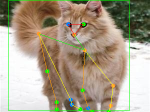

In [ ]:
from mmpose.apis import (inference_top_down_pose_model, init_pose_model,
                         vis_pose_result, process_mmdet_results)
from mmdet.apis import inference_detector, init_detector
local_runtime = False
from xtcocotools.coco import COCO
from mmcv import Config
from mmpose.datasets import DatasetInfo
import cv2

try:
  from google.colab.patches import cv2_imshow  # for image visualization in colab
except:
  local_runtime = True


# initialize pose model
# pose_config = 'configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/cats/res50_cats_128x128.py'
# pose_checkpoint = 'work_dirs/res50_cats_128x128/latest.pth'
pose_config = 'configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/cats/' + config_filename + '.py'
pose_checkpoint = 'work_dirs/' + config_filename + '/best_AP_epoch_160.pth'
# initialize pose model
pose_model = init_pose_model(pose_config, pose_checkpoint)

# Use coco api to read the validation set 
coco = COCO('data/cats/annotations/val.json')
img_keys = list(coco.imgs.keys())
image_id =  img_keys[-1]
image = coco.loadImgs(image_id)[0]
image_name = os.path.join('data/cats/images', image['file_name'])
ann_ids = coco.getAnnIds(image_id)

config = Config.fromfile(
    './configs/_base_/datasets/cats.py'
)
dataset = pose_model.cfg.data['test']['type']
dataset_info = pose_model.cfg.data['test'].get('dataset_info', None)
if dataset_info is None:
    warnings.warn(
        'Please set `dataset_info` in the config.'
        'Check https://github.com/open-mmlab/mmpose/pull/663 for details.',
        DeprecationWarning)
else:
    dataset_info = DatasetInfo(dataset_info)


# make bounding boxes
box_results = []
# val_results = []
for ann_id in ann_ids:
    item = {}
    ann = coco.anns[ann_id]
    # bbox format is 'xywh'
    item['bbox'] = ann['bbox']
    box_results.append(item)

# test a single image, with a list of bboxes
pose_results, returned_outputs = inference_top_down_pose_model(
    pose_model,
    image_name,
    box_results,
    bbox_thr=None,
    format='xywh',
    dataset='AnimalCatsDataset',
    dataset_info=dataset_info)

# print("pose_results: ", pose_results)

# show pose estimation results
vis_result = vis_pose_result(pose_model,
                             image_name,
                             pose_results,
                             kpt_score_thr=0.,
                             dataset='AnimalCatsDataset',
                             show=False)

# reduce image size
vis_result = cv2.resize(vis_result, dsize=None, fx=0.5, fy=0.5)

if local_runtime:
  from IPython.display import Image, display
  import tempfile
  import os.path as osp
  import cv2
  with tempfile.TemporaryDirectory() as tmpdir:
    file_name = osp.join(tmpdir, 'pose_results.png')
    cv2.imwrite(file_name, vis_result)
    display(Image(file_name))
else:
  cv2_imshow(vis_result)

### Save all predicted images to drive

In [ ]:
from mmpose.apis import (inference_top_down_pose_model, init_pose_model,
                         vis_pose_result, process_mmdet_results)
from mmdet.apis import inference_detector, init_detector
local_runtime = False
from xtcocotools.coco import COCO
from mmcv import Config
from mmpose.datasets import DatasetInfo
import cv2

try:
  from google.colab.patches import cv2_imshow  # for image visualization in colab
except:
  local_runtime = True


# initialize pose model
# pose_config = 'configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/cats/res50_cats_128x128.py'
# pose_checkpoint = 'work_dirs/res50_cats_128x128/latest.pth'
pose_config = 'configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/cats/' + config_filename + '.py'
pose_checkpoint = 'work_dirs/' + config_filename + '/best_AP_epoch_160.pth'
# initialize pose model
pose_model = init_pose_model(pose_config, pose_checkpoint)



# Use coco api to read the validation set 
coco = COCO('data/cats/annotations/val.json')


img_keys = list(coco.imgs.keys())

for i in range(len(img_keys)):

  image_id =  img_keys[i]
  image = coco.loadImgs(image_id)[0]
  image_name = os.path.join('data/cats/images', image['file_name'])
  ann_ids = coco.getAnnIds(image_id)

  config = Config.fromfile(
      './configs/_base_/datasets/cats.py'
  )
  dataset = pose_model.cfg.data['test']['type']
  dataset_info = pose_model.cfg.data['test'].get('dataset_info', None)
  if dataset_info is None:
      warnings.warn(
          'Please set `dataset_info` in the config.'
          'Check https://github.com/open-mmlab/mmpose/pull/663 for details.',
          DeprecationWarning)
  else:
      dataset_info = DatasetInfo(dataset_info)



  # make bounding boxes
  box_results = []
  # val_results = []
  for ann_id in ann_ids:
      item = {}
      ann = coco.anns[ann_id]
      # bbox format is 'xywh'
      item['bbox'] = ann['bbox']
      box_results.append(item)
      # val_results.append(item)
      # val_results.append(ann['keypoints'])
  # print("val_results: ", val_results)
  # test a single image, with a list of bboxes
  pose_results, returned_outputs = inference_top_down_pose_model(
      pose_model,
      image_name,
      box_results,
      bbox_thr=None,
      format='xywh',
      dataset='AnimalCatsDataset',
      dataset_info=dataset_info)

  # print("pose_results: ", pose_results)

  # show pose estimation results
  vis_result = vis_pose_result(pose_model,
                              image_name,
                              pose_results,
                              kpt_score_thr=0.,
                              dataset='AnimalCatsDataset',
                              show=False)

  # reduce image size
  vis_result = cv2.resize(vis_result, dsize=None, fx=0.5, fy=0.5)

  if local_runtime:
    from IPython.display import Image, display
    import tempfile
    import os.path as osp
    import cv2
    with tempfile.TemporaryDirectory() as tmpdir:
      file_name = osp.join(tmpdir, f'pose_results{image_id}.png')
      cv2.imwrite(file_name, vis_result)
      display(Image(file_name))
  else:
    # cv2_imshow(vis_result)
    file_name = osp.join('work_dirs/' + config_filename, f'pose_results{image_id}.png')
    cv2.imwrite(file_name, vis_result)

load checkpoint from local path: work_dirs/hrnet_cats_w48_13/best_AP_epoch_160.pth
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


### Test

In [ ]:
from mmpose.datasets import build_dataset, build_dataloader
from mmpose.models import build_posenet
from mmpose.apis import single_gpu_test
from mmcv.parallel import MMDataParallel
from mmcv.runner import load_checkpoint
import os
import mmcv

# build dataset
dataset = build_dataset(cfg.data.test, dict(test_mode=True))
test_loader_cfg = {**dict(shuffle=False, drop_last=False), 
              **dict(workers_per_gpu=cfg.data.get('workers_per_gpu', 1)),
              **dict(samples_per_gpu=cfg.data.get('samples_per_gpu', 1)),
              **cfg.data.get('test_dataloader', {})
             }
data_loader = build_dataloader(dataset, **test_loader_cfg)

# build model
model = build_posenet(cfg.model)
model = MMDataParallel(model, device_ids=[0])
# load_checkpoint(model, os.path.join(cfg.work_dir, "latest.pth"), map_location='cpu')
load_checkpoint(model, os.path.join(cfg.work_dir, "best_AP_epoch_160.pth"), map_location='cpu')

# create work_dir
mmcv.mkdir_or_exist(cfg.work_dir)

# train model
outputs = single_gpu_test(model, data_loader)
dataset.evaluate(outputs, cfg.work_dir)

loading annotations into memory...
Done (t=0.35s)
creating index...
index created!
=> num_images: 200
=> load 223 samples


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


load checkpoint from http path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth


Downloading: "https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth" to /root/.cache/torch/hub/checkpoints/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth


  0%|          | 0.00/243M [00:00<?, ?B/s]

2022-03-16 06:13:05,961 - mmpose - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: keypoint_head.final_layer.weight, keypoint_head.final_layer.bias



load checkpoint from local path: work_dirs/hrnet_cats_w48_13/best_AP_epoch_160.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 223/223, 10.4 task/s, elapsed: 21s, ETA:     0sLoading and preparing results...
DONE (t=0.28s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.000
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.000
 Average Recall     (AR) @[ IoU=0.75      | area=   al

OrderedDict([('AP', 0.0),
             ('AP .5', 0.0),
             ('AP .75', 0.0),
             ('AP (M)', 0.0),
             ('AP (L)', 0.0),
             ('AR', 0.0),
             ('AR .5', 0.0),
             ('AR .75', 0.0),
             ('AR (M)', 0.0),
             ('AR (L)', 0.0)])

Please simply ignore the evaluation results (0.000). It means nothing. Since the provided "test_info.json" does not contain any ground-truth keypoint annotations, so you cannot evaluate it locally. But you can obtain the "result_keypoints.json" under the work_dir.

### For submission

Finally, you should submit the training config file, model checkpoint, the training logs. They can be found in the work_dir.
TA will running model inference on the test set, and use the mAP of the test set for final performance ranking.

In the following, I will show how to prepare the files for submission.

In [ ]:
%cd ..
# change "123456" to your student ID
%mkdir 3035906502
%cd 3035906502
%mkdir models
%cp ../mmpose/work_dirs/hrnet_cats_w48_13/best_AP_epoch_160.pth ./models/model.pth # model checkpoint (choose the model you like.)
%cp ../mmpose/work_dirs/hrnet_cats_w48_13/None.log.json ./models/ # training log
%cp ../mmpose/configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/cats/hrnet_cats_w48_13.py ./models/ # config file 
%cp ../mmpose/work_dirs/hrnet_cats_w48_13/result_keypoints.json ./
# You also need to prepare the final report.pdf


# You also need to upload the codes and a simple README.txt describing which files are changed.
# NOTICE! Do NOT upload the dataset and the work_dirs. They are too large.

/content/drive/MyDrive/Colab
/content/drive/MyDrive/Colab/3035906502
